In [354]:
# Add relevant Jupyter notebook extensions
# defined in my virtual environment  

In [355]:
# You can double-check your Python path like this...

import sys  
import os

# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

arr


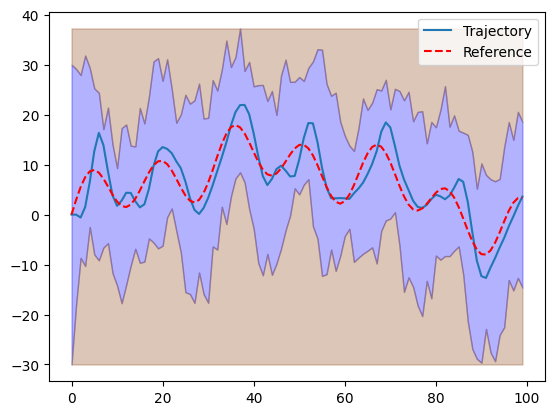

In [356]:
# Import relevant modules
sys.path.append(os.path.abspath('..'))
from uuv_mission.dynamic import *
from uuv_mission.terrain import *
from uuv_mission.control import *

sub = Submarine()
# Instantiate your controller (depending on your implementation)
mycontroller = controller(0.13,0.65)
closed_loop = ClosedLoop(sub,mycontroller)
mission = Mission.from_csv(r"C:\Users\benji\OneDrive - Nexus365\Catz Engineering\year 3\Standard\B1\code\python\b1-coding-practical-mt24\data\mission.csv")
trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

0.1355 0.63


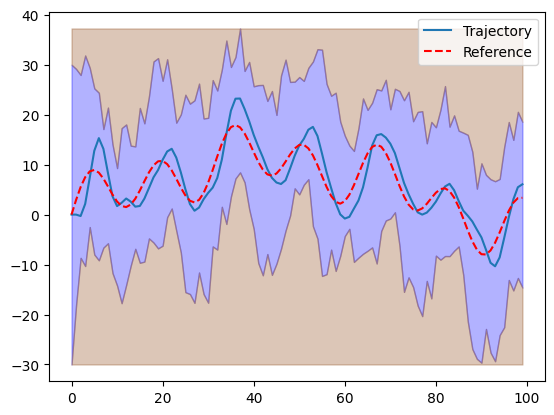

In [347]:

#Testing to find best controller 
n = 10 #size of space looking in 
step_size = 0.005 
error_results = np.zeros(n*n) #format i*10+j index
for i in range(0,n):
    for j in range(0,n):
        finalerror = 0
        for av in range(0,100):
            sub = Submarine()
            mycontroller = controller(0.15+((i-n/2)*step_size),0.65+((j-n/2)*step_size))
            closed_loop = ClosedLoop(sub,mycontroller)
            trajectory = closed_loop.simulate_with_random_disturbances(mission)
            finalerror += mycontroller.get_total_error()
        
        error_results[i*10+j] += finalerror/100
    
min_error = np.min(error_results)
min_index = np.argmin(error_results)
old_i = min_index/n
old_j = min_index%n
Kp_Op = 0.15+(old_i-n/2)*step_size
Kd_Op = 0.65+(old_j-n/2)*step_size

print((Kp_Op),Kd_Op)

#final test to see if its better. 
sub = Submarine()
mycontroller = controller(Kp_Op,Kd_Op)
# Instantiate your controller (depending on your implementation)
closed_loop = ClosedLoop(sub,mycontroller)
trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)

    
    


from looking at this above code and iterating a few times i found the best kp to be 0.13 and kd to be 0.65  